4. K-plus proche voisin
5. Arbres de décision

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb



In [30]:
digits=load_digits()
x , y = digits.data , digits.target

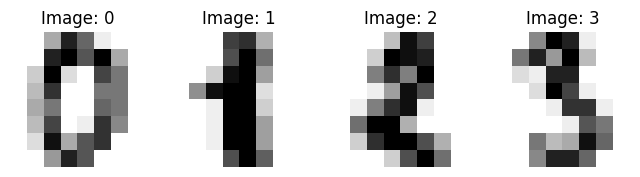

In [31]:
_ , axes = plt.subplots(nrows=1,ncols=4,figsize=(8,8))
for ax, image, label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Image: %i" %label)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1.0/3)

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
score= knn.score(x_test,y_test)
print("Score; %f"% score)

Score; 0.981636


In [35]:
neighbors = np.arange(1,21)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)

In [36]:
print(test_accuracy)

[0.98664441 0.98330551 0.98497496 0.97996661 0.98163606 0.97996661
 0.98497496 0.97829716 0.97996661 0.98330551 0.98163606 0.97996661
 0.97996661 0.97996661 0.97662771 0.97829716 0.97662771 0.97829716
 0.97495826 0.97328881]


<function matplotlib.pyplot.show(close=None, block=None)>

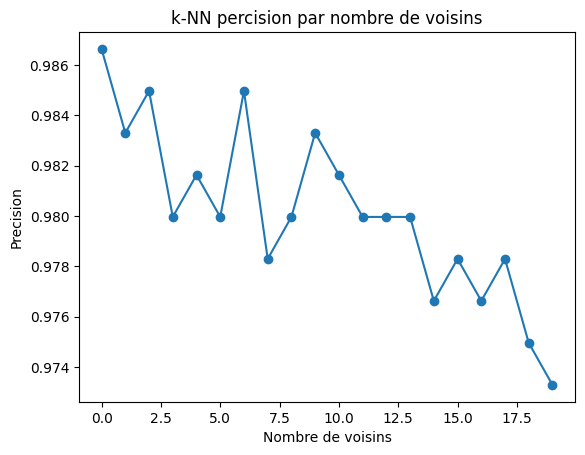

In [37]:
plt.plot(test_accuracy,"o-")
plt.title("k-NN percision par nombre de voisins")
plt.xlabel("Nombre de voisins")
plt.ylabel("Precision")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

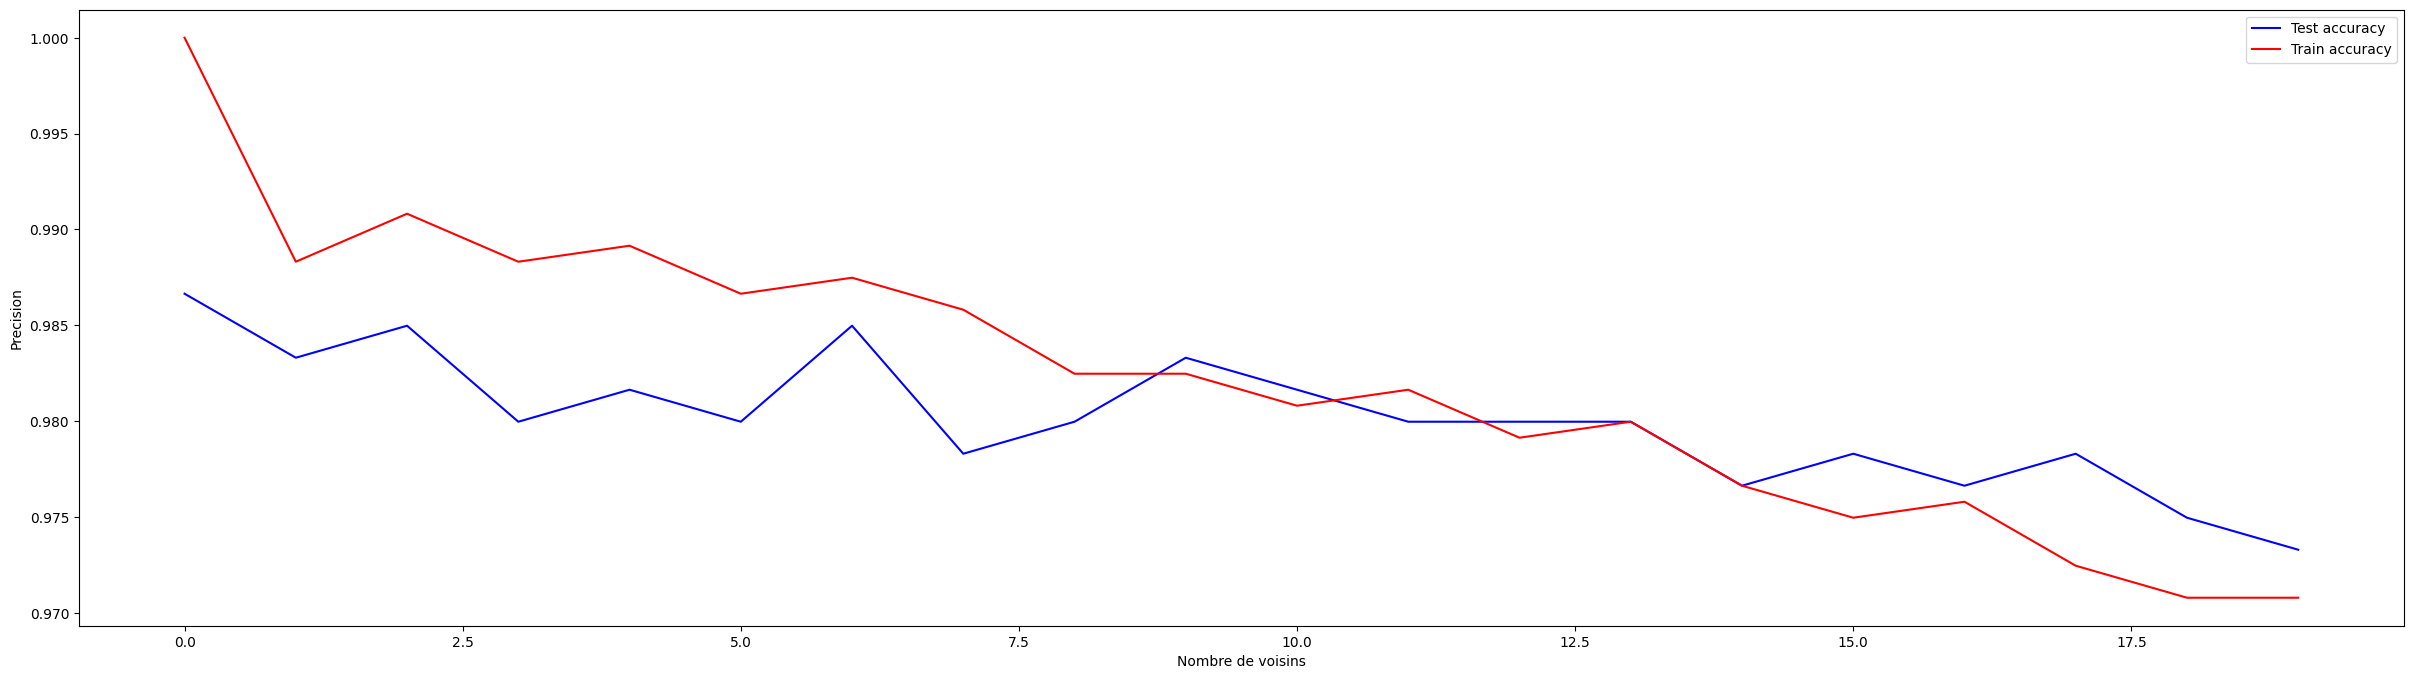

In [38]:
plt.figure(figsize=(30,8))
sb.lineplot(test_accuracy,label="Test accuracy",color="blue")
sb.lineplot(train_accuracy,label="Train accuracy",color="red")
plt.xlabel("Nombre de voisins")
plt.ylabel("Precision")
plt.legend()
plt.show

In [39]:
y_pred=knn.predict(x_test)


In [40]:
cm=confusion_matrix(y_test , y_pred)
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 69,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  1, 57,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 57,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 54]], dtype=int64)

In [41]:
np.bincount(y_test)

array([52, 69, 61, 62, 60, 59, 53, 65, 62, 56], dtype=int64)

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris


In [43]:
iris = load_iris()
w,z=iris.data, iris.target

In [44]:
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [45]:
w_train,w_test,z_train,z_test= train_test_split(w,z,test_size=1.0/3,random_state=1)

In [46]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(w_train,z_train)

DecisionTreeClassifier()

In [47]:
accuracyTreeTest=model_tree.score(w_test,z_test)
print("Precision de l arbre :", accuracyTreeTest)

Precision de l arbre : 0.96


In [51]:
for mdepth in [1,2,3,4,10]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf= clf.fit(w_train,z_train)
    print(clf.score(w_test,z_test))
for msplit in [2,3,5,10,20]:
    clf=tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf= clf.fit(w_train,z_train)
    print(clf.score(w_test,z_test))

0.62
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96


In [56]:
model_tree.predict([[1,1,2.4,0.70]])

array([0])

In [57]:
model_tree.predict([[1,1,5.4,0.70]])

array([1])